# What drives the price of a car?

![](images/kurt.jpeg)

OVERVIEW

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing. Your goal is to understand what factors make a car more or less expensive. As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

- The goal of the data task is to use supervised learning to predict the price of an used car based on its features(make, model , year).
- the main objective is to discover the most significant predictor aka feature by anaylzing the target varibale (price) and using data analysis like feature engineering and modling techniques like linear regression.

It is crucial to identify the features that increase the price of the vehicles for several reasons:
- Pricing Strategy: Identifying "value-adding" features enables sellers to set competitive and accurate prices to ensure that they maintain profit.
- Targeted Marketing: Marketing efforts can be tailored to highlight the most desirable vehicle features, attracting buyers who are specifically looking for those options and are willing to pay a premium.
 -Inventory Optimization: Dealers can make smarter purchasing decisions by focusing on vehicles equipped with high-demand features, leading to faster turnover and improved inventory efficiency

In [184]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# General
import time
from random import randint
import warnings
warnings.filterwarnings("ignore")

In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [186]:
# Load dataset from uploaded file
vehicle = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/vehicles.csv')

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

1. Initial Data Inspection
Load the dataset and display the first few rows (.head()).

Use .info() to understand the data types, non-null counts, and structure.

Use .describe() to get statistical summaries of numerical variables (e.g., price, mileage, year).

Examine .columns to identify available features and their relevance to the business goal.

2. Identify and Handle Missing Values
Use .isnull().sum() to count missing values per column.

Decide how to address them:

Drop rows/columns with excessive missingness.

Impute missing values using median, mode, or predictive methods where appropriate.

3. Explore Target Variable (price)
Visualize the distribution of car prices using histograms or boxplots.

Check for skewness and outliers (e.g., extremely low or high prices that may be errors).

Investigate any zero or negative prices, which may need to be excluded or corrected.

4. Examine Feature Distributions
Review distributions of important features such as year, mileage, condition, make, model, fuel, and transmission.

For categorical variables, use .value_counts() to understand frequency and potential grouping needs (e.g., rare car brands).

5. Check for Data Quality Issues
Look for inconsistent or misspelled values (e.g., "Good", "good", "GOOD").

Ensure correct data types (e.g., dates should be in datetime format).

Detect duplicate rows or entries and remove if needed.

Assess whether variables like year or mileage have unrealistic values (e.g., mileage > 1,000,000).

6. Assess Relationships Between Features
Begin identifying potential predictors of price.

Use correlation matrices for numeric features.

Create scatter plots (e.g., price vs. mileage) and boxplots (e.g., price by condition or make).

Check multicollinearity between features (especially if modeling).

7. Document Findings and Potential Feature Transformations
Note which features may need encoding (e.g., one-hot or label encoding for categorical variables).

Identify features that may benefit from transformation (e.g., log of mileage or price).

Flag any features that may need to be removed or combined due to low variance or redundancy.

In [187]:
vehicle.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [188]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [189]:
#check how much data has before modifying it
print(vehicle.shape)

(426880, 18)


In [190]:
#check the amount of Nan values
vehicle.isnull().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [191]:
#dropping the missing data
vehicle= vehicle.dropna(axis=0)

In [192]:
#double checking if the missing data is dropped
vehicle.isnull().sum()

,0
id,0
region,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0


In [193]:
vehicle.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
126,7305672709,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al
127,7305672266,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al
128,7305672252,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al


In [194]:
# Remove duplicates
vehicle= vehicle.drop_duplicates()

In [195]:
#Remove listings with invalid or extremely low prices
vehicle= vehicle[vehicle['price'] > 100]
vehicle

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,7303314912,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,1FTFX1EF5FFC24427,4wd,full-size,truck,black,wy
426788,7303227528,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
426792,7303114896,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy
426793,7303112347,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy


In [196]:
vehicle.value_counts('type').sort_values(ascending=False)

,count
type,
SUV,8542
sedan,7534
truck,6844
pickup,2563
van,1655
coupe,1332
hatchback,1089
convertible,795
wagon,620


In [197]:
# Remove duplicate rows
vehicle= vehicle.drop_duplicates()

In [198]:
#delete VIN and id column
vehicle = vehicle.drop(columns=['VIN', 'id'])
vehicle

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
215,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al
219,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al
268,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al
337,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al
338,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy
426788,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy
426792,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy
426793,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy


In [199]:
#check how much data has changed after cleaning data
print(vehicle.shape)

(31778, 16)


In [200]:
# make a column to seperate the states in to different areas in usa
west = ['ak', 'az', 'ca', 'co', 'hi', 'id', 'mt', 'nv', 'nm', 'or', 'ut', 'wa', 'wy']
central = ['al', 'ar', 'il', 'ia', 'ks', 'ky', 'la', 'mn', 'ms', 'mo', 'ne', 'nd', 'ok', 'sd', 'tx', 'wi']
east = ['ct', 'de', 'fl', 'ga', 'in', 'me', 'md', 'ma', 'mi', 'nh', 'nj', 'ny', 'nc', 'oh', 'pa', 'ri', 'sc', 'tn', 'vt', 'va', 'wv', 'dc']


def map_state_to_area(state):
    if state in west:
        return 'west'
    elif state in central:
        return 'central'
    elif state in east:
        return 'east'
    else:
        return 'other'  # For states not categorized or missing values

vehicle['area'] = vehicle['state'].apply(map_state_to_area)

vehicle['area'].value_counts()


,count
area,
east,15472
west,8235
central,8071


In [201]:
vehicle

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,area
215,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,fwd,compact,sedan,blue,al,central
219,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,rwd,mid-size,sedan,white,al,central
268,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,rwd,compact,convertible,white,al,central
337,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,fwd,full-size,truck,white,al,central
338,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,rwd,full-size,coupe,silver,al,central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426785,wyoming,23495,2015.0,ford,f150 xlt 4x4,like new,8 cylinders,gas,146795.0,clean,automatic,4wd,full-size,truck,black,wy,west
426788,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,fwd,compact,sedan,silver,wy,west
426792,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,4wd,full-size,pickup,brown,wy,west
426793,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,fwd,mid-size,sedan,black,wy,west


In [202]:
#seperate categorical features and numerical features
categorical_features = vehicle.select_dtypes(include=['object']).columns
numerical_features = vehicle.select_dtypes(include=['int64', 'float64']).columns

categorical_features, numerical_features


(Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
        'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
        'state', 'area'],
       dtype='object'),
 Index(['price', 'year', 'odometer'], dtype='object'))

In [203]:
# Handle missing values for numerical features
vehicle['year'] = vehicle['year'].fillna(vehicle['year'].median())
vehicle['odometer'] = vehicle['odometer'].fillna(vehicle['odometer'].median())

In [204]:
#Filter out rare categories (fewer than 10 entries) for selected columns

group_feature_columns = [
    'type', 'model', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
    'title_status', 'transmission', 'drive', 'size', 'paint_color', 'state', 'region'
]
for col in group_feature_columns:
    vehicle = vehicle.groupby(col).filter(lambda x: len(x) > 10)

# Reset the index after cleaning
vehicle.reset_index(drop=True, inplace=True)
vehicle


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,area
0,birmingham,7300,2007.0,lexus,rx350,good,6 cylinders,gas,181000.0,clean,automatic,fwd,mid-size,SUV,white,al,central
1,birmingham,5950,2007.0,mitsubishi,eclipse,good,4 cylinders,gas,72000.0,clean,manual,fwd,compact,hatchback,black,al,central
2,birmingham,10800,2013.0,toyota,camry,excellent,4 cylinders,hybrid,147000.0,clean,automatic,fwd,mid-size,sedan,grey,al,central
3,birmingham,6950,2011.0,volkswagen,jetta,excellent,5 cylinders,gas,116000.0,clean,automatic,fwd,full-size,sedan,silver,al,central
4,birmingham,48900,2018.0,chevrolet,silverado 2500 hd ltz,like new,8 cylinders,diesel,43034.0,rebuilt,automatic,4wd,full-size,truck,black,al,central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,milwaukee,33990,2016.0,chevrolet,express commercial cutaway,good,8 cylinders,gas,12398.0,clean,automatic,rwd,full-size,truck,white,wi,central
4300,milwaukee,44990,2015.0,ram,5500,good,6 cylinders,diesel,80733.0,clean,automatic,4wd,full-size,truck,white,wi,central
4301,milwaukee,25000,2017.0,rover,evoque,excellent,4 cylinders,gas,72000.0,clean,automatic,4wd,mid-size,SUV,white,wi,central
4302,milwaukee,25000,2017.0,rover,evoque,excellent,4 cylinders,gas,72000.0,clean,automatic,4wd,mid-size,SUV,white,wi,central


In [205]:
# Apply outlier filtering thresholds and IQR filtering
vehicle= vehicle[
    (vehicle['year'] >= 1980) &
    (vehicle['odometer'] <= 500000) &
    (vehicle['price'] <= 75000)
].copy()

# IQR outlier filtering for numerical columns
num_cols_to_filter = ['price', 'odometer', 'year']
for col in num_cols_to_filter:
    Q1 = vehicle[col].quantile(0.25)
    Q3 = vehicle[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    vehicle= vehicle[(vehicle[col] >= lower_bound) & (vehicle[col] <= upper_bound)]

In [206]:
#missing values for categorical features
categorical_features= [
    'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
    'title_status', 'transmission', 'drive', 'type', 'paint_color', 'area', 'state'
]

for col in categorical_features:
    if col in vehicle.columns:
        vehicle[col] = vehicle[col].fillna('unknown')

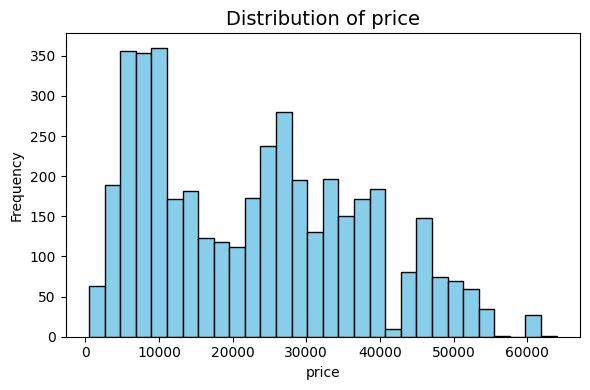

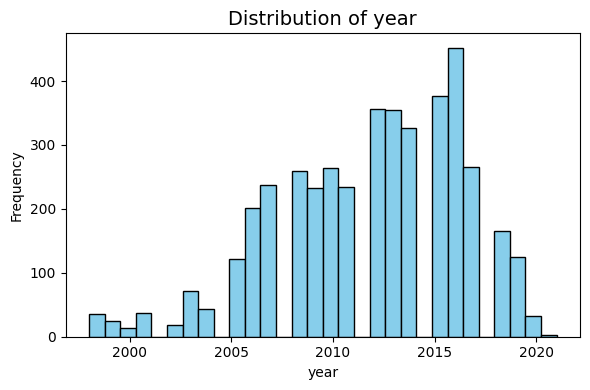

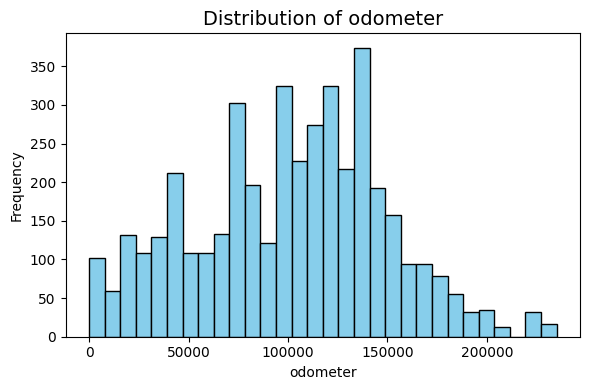

In [207]:
#plot numerical features
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    plt.hist(vehicle[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

    # Save each figure with a unique filename
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/images/freq_{col}.png')
    plt.show()


In [ ]:
#plot categorical features
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=vehicle, x=col, color='lightgreen', edgecolor='black')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    # Save each figure with a unique filename
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/images/freq_{col}.png')
    plt.show()


In [ ]:
#plot each feature against price
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(vehicle, x='price', y=col ,color='lightgreen')
    plt.xticks(rotation=90)
    plt.title(f'Price Distribution by {col}')
    plt.ylabel(col)
    plt.xlabel('Price')
    plt.tight_layout()
      # Save each figure with a unique filename
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/images/price vs.{col}.png')
    plt.show()

Price Distrubution:
- In area feature: the highest mean of the price of car is in the east area
- in the paint-color: the highest mean of the price car was red
- In the type: the highest mean of the price car was truck with van and convertible in a tie
- In the type feature: the full size type has the highest avg price
- in the drive feature: the highest mean was 4wd
- the trnasission: highest mean is automatic
- in title-status: the highest mean is rebuilt
- in fuel:the highest mean is diesel
- in cylinders:the highest mean  is 8 cylinders
- in condition: the highest mean is like new
- in manufacturer:the highest mean  is the ram/benz

In [ ]:
# Plot price against each numerical feature
plt.figure(figsize=(10, 5))
sns.boxplot(vehicle, x='year', y='price')
plt.xticks(rotation=45)
plt.title("Price vs. Year")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/images/pricevsyr')
plt.show()

-The highest car price range is around 2015-2021

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(vehicle, x='odometer', y='price')
plt.xticks(rotation=45)
plt.title("Price vs. Odometer")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/images/pricevs_odometer')
plt.show()

- The dense cluster at 50000-150000 and low-to-mid pricing indicates the sweet spot for typical used car inventory.

In [ ]:
#correlation heatmap

# Select numeric features to plot correlations
num_df = vehicle[['year', 'odometer', 'price']]

# Compute correlation matrix
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/images/corr_matyr')
plt.show()

According to the heat correlation map the highest correlation is between price and yr at .45.

In [ ]:
vehicle['price'].describe().round(2)

In [ ]:
vehicle.head()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
#feature engineering-> creating new feature
vehicle['age'] = 2025 - vehicle['year']

In [ ]:
# Apply log transformation to price
vehicle['price_log'] = np.log1p(vehicle['price'])

In [ ]:
#correlation heatmap

# Compute correlation matrix
# Select numeric features to plot correlations
numeric_features = vehicle[['year', 'odometer', 'price', 'price_log']]

corr = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/images/corr_mat_price_log')
plt.show()

Adding price_log to the correlation map, gives a higher correlation to yr than the regular "price. we will be using the "price log" as a target:

In [ ]:

# Drop unnecessary columns/ high-cardinality columns
vehicle['price_log'] = np.log1p(vehicle['price'])  # Ensure log price is present
X = vehicle.drop(columns=['price', 'price_log', 'region', 'model', 'state'])

y_log = vehicle['price_log']
y_orig = vehicle['price']

# Replace inf/-inf with NaN, then drop
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

# Align target variables
y_log = y_log.loc[X.index]
y_orig = y_orig.loc[X.index]

# Reset index
X.reset_index(drop=True, inplace=True)
y_log.reset_index(drop=True, inplace=True)
y_orig.reset_index(drop=True, inplace=True)


In [ ]:
# Visualize distribution of raw price vs. log(price)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(y_orig, bins=50, ax=axs[0], color='skyblue')
axs[0].set_title('Distribution of Raw Price')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Count')

sns.histplot(y_log, bins=50, ax=axs[1], color='salmon')
axs[1].set_title('Distribution of Log-Transformed Price')
axs[1].set_xlabel('log(1 + Price)')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/images/price_log')
plt.show()


Log-Transformed Price (log(1 + price)) is clearly better for modeling.

- Removes extreme skew and compresses high-end outliers

- Makes the relationship between predictors and target more linear

- Improves performance and interpretability of models like Linear, Ridge, Lasso

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
print(vehicle.columns)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 4. Define numeric & categorical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_cols, categorical_cols

In [ ]:
print(f"Train set size: {X_train.shape}. Number of labels in the train set: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Number of labels in the test set: {y_test.shape}")

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.impute import SimpleImputer

# Define numeric and categorical features based on the columns remaining in X
# after dropping 'price', 'price_log', 'region', 'model', 'state' in a previous step
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Create pipeline for numeric features with polynomial expansion
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# Model specs with cross-validation
def evaluate_with_cv(pipe, X_train, y_train):
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2')
    return scores.mean(), scores.std()

In [ ]:
# Define models and parameters
models = {
    'Linear Regression': {
        'estimator': LinearRegression(),
        'param_grid': {}
    },
    'Ridge Regression': {
        'estimator': Ridge(),
        'param_grid': {'regressor__alpha': [0.1, 1, 10]}
    },
    'Lasso Regression': {
        'estimator': Lasso(max_iter=10000),
        'param_grid': {'regressor__alpha': [0.0001, 0.001, 0.01]}
    }
}


In [ ]:
results = {}
for name, spec in models.items():
    steps = [('preprocessor', preprocessor), ('regressor', spec['estimator'])]
    pipe = Pipeline(steps)
    if spec['param_grid']:
        grid = GridSearchCV(pipe, spec['param_grid'], scoring='r2', n_jobs=-1, cv=5)
        grid.fit(X_train, y_train)
        model = grid.best_estimator_
        best_params = grid.best_params_
        cv_score, cv_std = grid.cv_results_['mean_test_score'][grid.best_index_], grid.cv_results_['std_test_score'][grid.best_index_]
    else:
        pipe.fit(X_train, y_train)
        model = pipe
        best_params = None
        # Use evaluate_with_cv for models without GridSearchCV
        mean_score, std_score = evaluate_with_cv(pipe, X_train, y_train)
        cv_score = mean_score
        cv_std = std_score

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {
        'model': model,
        'best_params': best_params,
        'cv_score': cv_score,
        'cv_std': cv_std,
        'r2': r2,
        'rmse': rmse,
        'mae': mae
    }

In [ ]:
# Show summary table
results_df = pd.DataFrame({
    model: {
        'CV R² (mean)': res['cv_score'],
        'CV R² (std)': res['cv_std'],
        'Test R²': res['r2'],
        'Test RMSE': res['rmse'],
        'Test MAE': res['mae'],
        'Best Params': res['best_params']
    } for model, res in results.items()
}).T

print(results_df)

In [ ]:
# Plot CV scores with error bars
plt.figure(figsize=(10, 6))
models = results_df.index.tolist()
means = results_df['CV R² (mean)'].values.astype(float)
errors = results_df['CV R² (std)'].values.astype(float)

plt.bar(models, means, yerr=errors, capsize=5, color='green')
plt.ylabel('CV R² (mean ± std)')
plt.title('Cross-Validated R² Scores with Error Bars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/images/cv_r2')
plt.show()

In [ ]:
# Get the top coefficients
# Create a DataFrame for coefficients


top_coef_df = coef_df.sort_values('abs_coef', ascending=False).head(100)

# Features of interest (exact and all dummies)
selected_keywords = ['year', 'fuel', 'odometer', 'condition', 'model']

# Select features containing any of the keywords above
selected_coef_df = coef_df[coef_df['feature'].apply(lambda x: any(key in x for key in selected_keywords))]

selected_coef_df = selected_coef_df.sort_values('abs_coef', ascending=False)

print("\nTop Coefficients for Key Features in Best Model:")
print(selected_coef_df.head(20))

In [ ]:
# Plotting the coefficients

plot_df = selected_coef_df[['feature', 'coefficient']].copy()
plot_df = plot_df.sort_values('coefficient', ascending=True)  # Smallest (most negative) on bottom

plt.figure(figsize=(9, 6))
bars = plt.barh(plot_df['feature'], plot_df['coefficient'], color='royalblue')
plt.axvline(0, color='black', linewidth=0.8)
plt.title('Impact of Key Features on Used Car Price')
plt.xlabel('Coefficient Value (Effect on Price)')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Module 11: Practical 2 with cars/images/key_features1')
plt.show()